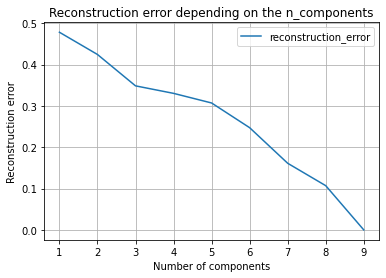

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.cm as cm
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from math import sqrt

#getting the data set
data=pd.read_csv('brain_stroke.csv',index_col=0)
data.head(-5)
#print(data)
#print(data.isna().sum())
#print(data.info())

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))


#establishing the training set and the test set
X=data.drop(["stroke"],axis=1)
y=data["stroke"]

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

error_list=[]
for k in range(1,10):
    rca = GaussianRandomProjection(n_components=k, random_state=42).fit(X)
    X_red=rca.transform(X)
    X_inv=rca.inverse_transform(X_red)
    mean_sq_er=metrics.mean_squared_error(X_inv,X)
    error_list.append(sqrt(mean_sq_er))

n_components=[k for k in range(1,10)]
fig, ax1=plt.subplots()
ax1.plot(n_components, error_list, label="reconstruction_error")
ax1.set_title('Reconstruction error depending on the n_components')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Reconstruction error')
ax1.legend()
ax1.grid()
plt.show()